<a href="https://colab.research.google.com/github/xuan-415/MNIST/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[-742151.13339207  153845.06683298 -264806.46560462 -135196.65492281
  -459999.33537663 -223274.91110086 -279465.62421869 -221549.88261119
  -272375.14926004 -100547.9389427 ]]


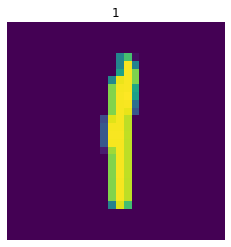

Prediction was [ True]
[0.9124  0.91005 0.90925]
Accuracy score after training on augmented dataset 0.9175
confusion matrix : 
[[5743    2   15    9    9   42   42   10   47    4]
 [   2 6484   42   24    6   43    5   10  115   11]
 [  59   39 5320   97   83   23   90   68  166   13]
 [  45   37  126 5342    2  236   36   60  157   90]
 [  21   25   33    9 5379   11   57   33   87  187]
 [  64   36   35  191   77 4612  110   27  192   77]
 [  34   28   43    2   46   90 5618    8   49    0]
 [  24   22   62   30   61   11    6 5827   20  202]
 [  49  143   61  144   13  166   57   27 5087  104]
 [  43   31   30   90  168   40    3  233   89 5222]]


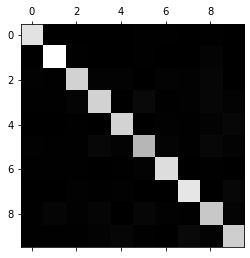

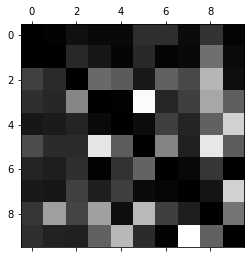

4422102/4422102 [==============================] - 0s 0us/step
[[-1161585.28995879  -505173.96599425  -608430.11647525  -479845.73016393
   -374408.26587325  -388914.74569969  -677652.57836559 -1254671.03526936
    595571.11890213 -2116626.464659  ]]


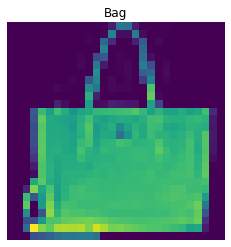

Prediction was [ True]
[0.83405 0.8333  0.8347 ]


In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import pandas as pd 
from keras.utils import np_utils
from scipy.ndimage.interpolation import shift
import keras
from keras.datasets import fashion_mnist
from sklearn.svm import SVC
import os
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# 第一題 The MNIST dataset

# #load資料
(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()

# print('train data=', len(x_train_image))
# print('test data=', len(x_test_image))
# print('x_train_image :', x_train_image.shape) # x_train_image : (60000, 28, 28)
# print('y_train_label :', y_train_label.shape) # 共60000張圖片資料，圖片像素28*28


# # 建立plot_image函數，顯示images數字影像
# def plot_image(image):
#     fig = plt.gcf() # 設定顯示圖形的大小
#     fig.set_size_inches(2,2)
#     plt.imshow(image, cmap='binary') # camp="binary"表示以黑白色顯示
#     plt.show()

# def plot_images_labels(images, labels, idx, num = 10):
#     fig = plt.gcf() # 設定顯示圖形的大小
#     fig.set_size_inches(12, 14)
#     if num > 25: num = 25 # 如果顯示筆數參數大於25鎖定在25，避免輸出時發生錯誤
#     for i in range(0, num): 
#         ax = plt.subplot(5, 5, 1+i) # 建立subgraph子圖形為5行5列
#         ax.imshow(images[idx], cmap='binary') # 劃出subgraph子圖形
#         title = "label=" + str(labels[idx]) # 設定子圖形的title，顯示標籤欄
#         ax.set_title(title, fontsize = 10) # 子圖形的標題tilte與大小
#         ax.set_xticks([]);ax.set_yticks([]) # 設定不顯示刻度
#         idx += 1 # 讀取下一筆
#     plt.show()



# # #顯示圖片
# # # plot_image(x_train_image[1])
# # # plot_images_labels(x_train_image, y_train_label, idx=0)
# # #----------------------------------------------------------

# # #資料預處理 (features)
x_Train = x_train_image.reshape(60000, 28*28).astype('float32') 
x_Test = x_test_image.reshape(10000, 28*28).astype('float32')
# # #----------------------------------------------------------

# # #查看轉換為1維向量的shape
# # print('x_train:', x_Train.shape)
# # print('x_train:', x_Test.shape)

# 1. Use SGDClassifier for the MNIST dataset and measure the accuracy (the ratio of correct predictions) using cross-validation (cv=3).
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_Train[shuffle_index],y_train_label[shuffle_index]
sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=10)
sgd_clf.fit(x_train, y_train)

rand_index = np.random.choice(x_Test.shape[0])
pred = sgd_clf.predict(x_Test[rand_index].reshape(1, -1))
print(sgd_clf.decision_function(x_Test[rand_index].reshape(1, -1)))

plt.imshow(x_Test[rand_index].reshape(28, 28))
plt.axis('off')
plt.title(y_test_label[rand_index])
plt.show()
print('Prediction was', pred == y_test_label[rand_index])
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train.astype(np.float64))
print(cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy'))

#____________________________________________________________________________________

# 2. Using Data Augmentation (artificially growing the training set) to see if the accuracy can be improved

def shift_digit(digit_array, dx, dy, new=0):
  return shift(digit_array.reshape(28, 28), [dy, dx], cval=new).reshape(784)

x_train_expanded = [x_Train]
y_train_expanded = [y_train_label]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
  shifted_images = np.apply_along_axis(shift_digit, axis=1, arr=x_train, dx=dx, dy=dy)
  x_train_expanded.append(shifted_images)
  y_train_expanded.append(y_train_label)

x_train_expanded = np.concatenate(x_train_expanded)
y_train_expanded = np.concatenate(y_train_expanded)
 
rf_clf_for_augmented = RandomForestClassifier(random_state=42)
rf_clf_for_augmented.fit(x_train_expanded, y_train_expanded)

y_pred_after_augmented = rf_clf_for_augmented.predict(x_Test)
score = accuracy_score(y_test_label, y_pred_after_augmented)
print("Accuracy score after training on augmented dataset", score)

#____________________________________________________________________________________

y_TestOneHot = np_utils.to_categorical(y_test_label)
y_TrainOneHot = np_utils.to_categorical(y_train_label)

# 3. Is there any technique (such as normalization or hyperparameter tuning forSGDClassifier) that can further improve the performance?
x_Train_normalization = x_Train / 255.0
x_Test_normalization = x_Test / 255.0


#____________________________________________________________________________________

# 4. Using the confusion matrix to gain insights for performance evaluation/comparison

print('confusion matrix : ')
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
print(conf_mx)
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

#____________________________________________________________________________________

# 第二題 The Fashion MNIST dataset

import keras
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

label = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 
         'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# # # 建立plot_image函數，顯示images數字影像
# # def plot_image(image):
# #     fig = plt.gcf() # 設定顯示圖形的大小
# #     fig.set_size_inches(2,2)
# #     plt.imshow(image, cmap='binary') # camp="binary"表示以黑白色顯示
# #     plt.show()

# # def plot_images_labels(images, labels, idx, num = 10):
# #     fig = plt.gcf() # 設定顯示圖形的大小
# #     fig.set_size_inches(12, 14)
# #     if num > 25: num = 25 # 如果顯示筆數參數大於25鎖定在25，避免輸出時發生錯誤
# #     for i in range(0, num): 
# #         ax = plt.subplot(5, 5, 1+i) # 建立subgraph子圖形為5行5列
# #         ax.imshow(images[idx], cmap='binary') # 劃出subgraph子圖形
# #         title = str(label[idx]) # 設定子圖形的title，顯示標籤欄
# #         ax.set_title(title, fontsize = 10) # 子圖形的標題tilte與大小
# #         ax.set_xticks([]);ax.set_yticks([]) # 設定不顯示刻度
# #         idx += 1 # 讀取下一筆
# #     plt.show()

# # plot_image(x_train[1])
# # plot_images_labels(x_train, y_train, idx=0)

x_Train = x_train.reshape(60000, 28*28).astype('float32') 
x_Test = x_test.reshape(10000, 28*28).astype('float32')

# 1. Use the Fashion MNIST dataset as the target for classification and repeat steps in Part 1.

shuffle_index = np.random.permutation(60000)
x_train, y_train = x_Train[shuffle_index],y_train[shuffle_index]
sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=10)
sgd_clf.fit(x_train, y_train)

rand_index = np.random.choice(x_Test.shape[0])
pred = sgd_clf.predict(x_Test[rand_index].reshape(1, -1))
print(sgd_clf.decision_function(x_Test[rand_index].reshape(1, -1)))
plt.imshow(x_Test[rand_index].reshape(28, 28))
plt.axis('off')
plt.title(label[y_test[rand_index]])
plt.show()
print('Prediction was', pred == y_test[rand_index])
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train.astype(np.float64))
print(cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy'))

#____________________________________________________________________________________

# Part2 Is there any technique (such as normalization or hyperparameter tuning for SGDClassifier) that can further improve the performance?

X_Train_normalization = x_train / 255
X_Test_normalization = x_train / 255

#____________________________________________________________________________________

# 3. Compare SGDClassifier’s performance on the two datasets.